In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **다항 분포**


다항 분포는 이름 그대로에서 알 수 있듯이 이항 분포의 더 높은 차원을 가지는 분포이다. 

다항 분포의 사건들은 3개 이상의 독립 사건들로 이뤄져있다.

다항 분포는

$Mult$~$(n,\bm{p})$ 으로 표기되는데

여기서 $\bm{p}$ 는 벡터 형태의 확률값들이다.

다항 분포는 P($x_1 = n_1 , x_2 = n_2 , x_3 = n_3 ... x_n = n_n$) 으로 표현 할 수 있다.

$x_i$ 는 i 번 째 사건이며 , $n_i$ 는 i 번째 사건에 존재하는 사건의 개수를 의미한다.

즉 $x_i$ 개의 사건들에 사건이 $n_i$ 번 발생하는 사건들의 분포의 **결합 확률 분포**를 의미한다.

바구니에 빨간 공이 5개, 파란 공이 3개, 노란 공이 2개 있는 경우를 생각해보자 

바구니에서 공을 복원 추출하며 10개를 뽑는다고 가정해보자

$n = 10$

빨간공,파란공,노란공을 뽑는 사건들 $x_r,x_b,x_y$ 라고 하고

빨간공, 파란공, 노란공을 뽑는 확률들을 $p_r,p_b,p_y$ 라고 한다면 

$p_r = 0.5 , p_b = 0.3, p_y = 0.2$ 이다.

**위에서 알 수 있듯 가능한 사건들 확률의 총합은 1이다. 또한 확률이기 때문에 모두 0 이상의 값을 갖는다**

빨간공을 4개 뽑고, 파란 공을 4개, 노란 공을 2개 뽑을 확률을 구해보자

$P(x_r = 4, x_b = 4, x_y = 2)$ 를 물어보는 것이다.

해당 확률값을 보면 알 수 있듯, 각 시행들이 동시에 일어나는 결합 확률 분포를 물어보는 것인데

각 사건들은 모두 독립적인 이항 분포를 따른다.

빨간 공을 뽑는 사건은 $Bin$~$(n,p_r = 0.5)$ 파란 공을 뽑는 사건은 $Bin$~$(n,p_b = 0.3)$ , 노란 공을 뽑는 사건은 $Bin$~$(n,p_y = 0.2)$ 를 따른다.

독립적인 사건들로 이뤄진 결합 확률 분포에서의 확률인 $P(x_r = 4, x_b = 4, x_y = 2)$  는

빨간공을 4개 뽑는 확률 x 파란 공을 4개 뽑는 확률 x 노란 공을 2개 뽑는 확률로 나타낼 수 있다.

위에서 말 했듯이, 각 공을 뽑는 사건들은 해당 색의 공을 i 개 뽑는 모두 독립적인 이항분포인 사건이기 때문이다.

그렇다면 10개의 공을 뽑을 때 해당 사건들이 동시에 일어나는 확률은 

- 빨간공을 4개 뽑는 확률 = $p_r^4$ = $0.5^4$
- 파란공을 4개 뽑는 확률 = $p_b^4$ = $0.4^4$
- 노란공을 2개 뽑는 확률 = $p_y^2$ = $0.2^2$

$0.5^4$ * $0.4^4$ * $0.2.^2$ 로 볼 수 있다.

이 때 공을 뽑는 순서들은 고려하지 않기 때문에 경우의 수들을 고려할 필요가 있다.

10개의 공을 뽑아서 생기는 경우의 수  = $10!$

각 카테고리 별 뽑았을 때 생기는 경우의 수 = $4! * 4! * 2!$

로 나타낼 수 있다.

뽑은 빨간공이 4개라면, 빨간공들 4개의 자리에 있을 수 있는 경우의 수는 4! 개이다.

그렇다면 확률을 표현하면 


$P(x_r = 4, x_b = 4, x_y = 2)$ = $0.5^4$ * $0.4^4$ * $0.2.^2$ * $\frac{10!}{4! \cdot 4! \cdot 2!}$

In [12]:
def multinomial(r,b,y):
    
    # 전체 경우의 수 
    N = r + b + y 
    
    p_r = 0.5 
    p_b = 0.4 
    p_y = 0.2

    return p_r ** r * p_b ** b * p_y ** y * math.factorial(N)/(math.factorial(r) * math.factorial(b) * math.factorial(y))


In [13]:
print('빨간 공을 4개, 파란 공을 4개, 노란 공을 2개 뽑을 확률은')
multinomial(4,4,2) 

빨간 공을 4개, 파란 공을 4개, 노란 공을 2개 뽑을 확률은


0.20160000000000008

위의 식을 일반화 하여 쓰면 다음과 같다.

* 다항 분포의 PMF

$P(x_1 = n_1 , x_2 = n_2 , ... , x_n = n_n)$ = $p_1^{n_1} * p_2 ^ {n_2} ... , p_n^{n_n}$ * $\frac{N!}{n_1 ! * n_2 ! ... * n_n!}$

# **다항 분포의 다양한 특성**

**전체 사건, 확률의 법칙**

이전에 말했지만 각 사건이 일어날 확률의 합은 모두 1이 되어야 하고

각 독립사건들이 일어날 사건의 합은 전체 시행 횟수와 같아야 한다.

$p_1 + p_2 + ... p_n = 1$

$n_1 + n_2 + ... n_n = N$

### **다항 분포의 기대값과 분산**

위에서 말했듯, 다항 분포는 독립적인 이항 분포들의 결합 확률 분포라고 했다. 

$P(x_1 = n_1 , x_2 = n_2 , ... , x_n = n_n)$ = $p_1^{n_1} * p_2 ^ {n_2} ... , p_n^{n_n}$ * $\frac{N!}{n_1 ! * n_2 ! ... * n_n!}$

에서 1번 째 사건의 확률 분포, 즉 1번째 사건에 대한 marginal distribution 을 구하고 싶다고 해보자

그렇다면 1번째 사건의 확률 분포는 n 번의 시행 중 1번째 사건이 일어날 확률인 $p_1$ 의 이항분포를 따른다.

$X_1$ ~ $Bin(n,p_1)$

그렇다면 Marginal distribution 의 기대값과 분산은 이항 분포의 공식처럼 똑같이 구해진다.

$E[X_1] = n * p_1$

$Var[X_1] = n * p_1 * (1 - p_1)$

그렇다면 사건이 1번부터 n 번까지 모두 존재하는 다항 분포의 기대값은 ? 

$E[X_1] + E[X_2] ... + E[X_n] = n * p_1 + n * p_2 ... * n * p_n$

$= n(p_1 + p_2 ... + p_n)$ 확률의 총합은 1인걸 기억하자

$= n$

분산도 위와 같이 $n$ 이 나온다

## **다항 분포의 Lumping property (덩어리 성질)**

위처럼 똑같이 공을 여러개 뽑는데 이번엔 공이 많다고 해보자

빨간공, 주황색공, 노란색공 .... 보라색공, 무지개 색의 총 7가지의 공이 있다고 해보고

각 공이 뽑일 확률은

빨간공은 0.2 , 주황색 공은 0.3, 노란색공부터 보라색 공이 뽑일 확률은 모두 0.1 이라고 해보자

전체 공들이 뽑힐 확률을 모두 더하면 1이 나오기 때문에 해당 확률값들은 가능한 값이다.

내가 공을 N 번 뽑아서 각기 공들을 뽑을 확률을 구하고자 한다면, 일어날 수 있는 전체 사건은 모든 공들에 대해서 총 7가지이다.

그런데 만약 일어날 수 있는 사건을 빨간공을 몇개, 주황공을 몇개, 나머지 공을 몇개 뽑을 확률,

나머지 공들을 하나의 카테고리로 묶는다면 나머지 공들을 뽑을 확률은 어떻게 될까 ? 

직관적으로 알 수 있듯, 나머지 공들(노란색, 파란색 ... 보라색 총 5가지)이 뽑힐 확률이 모두 더해져 $0.1 + 0.1 + 0.1 + 0.1 + 0.1  = 0.5$ 가 된다. 

$p_r = 0.2 , p_o = 0.3 , p_{Other} = 0.5$

### **조건부 확률**

그렇다면 위 사건 [$p_r = 0.2 , p_o = 0.3 , p_{Other} = 0.5$] 에서 10개를 뽑는데 빨간공을 이미 1개를 뽑았고, 더 이상 빨간공을 뽑지 못하도록 모두 제거했다고 해보자

그렇게 되면 내가 주황색 공을 뽑을 확률은 여전히 0.3 일까 ? 

직관적으로 생각해도 빨간공을 제거해버렸으니 주황색 공을 뽑을 확률이 변경 될 것 같다.

이를 조건부 확률로 표현해본다면

P(주황색 공을 뽑을 확률|빨간색 공을 뽑지 않으면서) 이렇게 표현 할 수 있다.

해당 조건부 확률을 풀이해보면

P(주황색 공을 뽑으면서 빨간색 공을 뽑지 않을 확률) / P(빨간색 공을 뽑지 않을 확률) 처럼 나타낼 수 있는데

두 사건 (주황색 공을 뽑는 사건, 빨간색 공을 뽑지 않는 확률)에서 한 사건이 다른 사건을 캡쳐하기 때문에 [주황색 공을 뽑으면 당연히 빨간색 공을 뽑지 않게 된다] 

주황색 공만 뽑는 사건으로 변경 된다.

그렇다면 결국

$\frac{p_o}{1 - p_r}$ 로 나타나게 되고 $1 - p_r$ 은 결국 $p_o + p_{Other}$ 임을 알 수 있다.

$\frac{p_o}{p_o + p_{Other}}$ 로 변경된다.

결국, 다항 분포에서 조건부 확률은 주어진 사건이 있다면 해당 주어진 사건을 전체 확률에서 제거한 후, 나머지 확률 벡터의 원소들의 합이 1이 되도록 정규화 시킨 후 확률을 계산하게 된다.

직관적으로 생각해도, 빨간색 공을 더이상 뽑지 않기로 한다면, 주황색 공이 뽑힐 확률은 주황색공과 나머지 공들 중 뽑힐 확률로 변경된다.  

# **다항 분포 시각화**

다항 분포는 이항 분포의 차원을 늘린 것이라고 했다.

이항 분포의 그래프부터 봐보자

In [30]:
def binomial_pdf(n, p, k):
    return(math.comb(n,k)* p**k * (1-p)** (n-k))

Text(0.5, 1.0, '$X$~$Bin(n,p)$의 그래프')

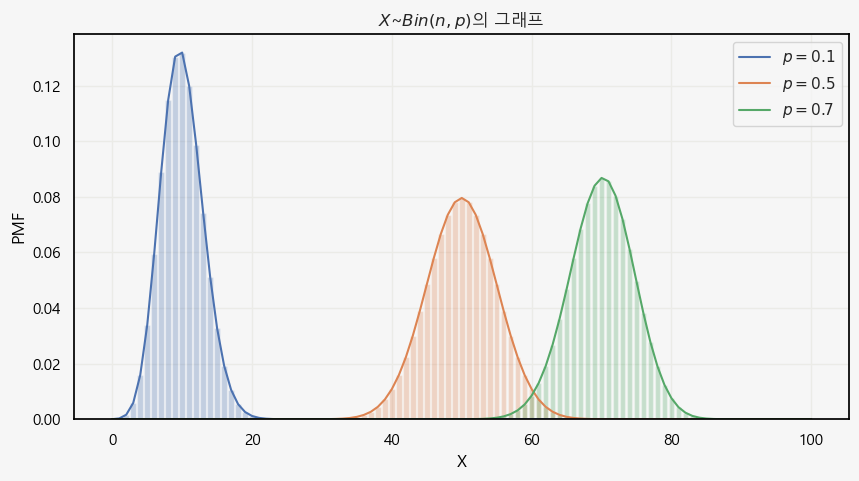

In [42]:
fig,ax = plt.subplots(figsize = (10,5))

n = 100

for p in [0.1,0.5,0.7]:
    
    pmf = [binomial_pdf(n = n , p = p , k = i) for i in range(n + 1)]
    
    ax.bar(list(range(n +1)), pmf, alpha = 0.3)
    ax.plot(list(range(n +1)), pmf, label = f'$p = {p}$')
    
    
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('PMF')

ax.set_title('$X$~$Bin(n,p)$의 그래프')

이항 분포의 독립 사건은 사건이 일어난다와 일어나지 않는다, 한 가지의 사건으로 이뤄져있다. 

다항 분포를 구현해보자 

In [117]:
def multinomial_prob(n, p_list, k_list):
    
    event = math.factorial(n) / np.prod([math.factorial(k) for k in k_list])
    
    prob = np.prod([p ** k for p,k in zip(p_list,k_list)])
    
    return event * prob